In [14]:
%matplotlib inline
import pycamhd.pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import urllib as url

logLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/03/12/CAMHDA301-20170312T000000.log"
movLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2017/03/12/CAMHDA301-20170312T181500.mov"

In [17]:
movAtom = camhd.get_moov_atom(movLink)
frames = camhd.get_frame_count(movLink, movAtom)
FPS = 30
#print("Total Frames: " + str(frames))             26983

logFile = url.request.urlopen(logLink)
logList = logFile.readlines()

sceneTimes = []
inMotion = False
timeSubstring = ""
startTime = 0
endTime = 0
#print(endTime - startTime)                        855
                     
index = 0;

while index < len(logList):
    line = logList[index]
    index+=1
    if (line[0] == ord('>')):
        line = line[1:]
    
    if "STOPPED:" in str(line):
        if inMotion:
            inMotion = False
        
    if "time" in str(line) and not inMotion:
        fullLine = str(line)
        timeSubstring = fullLine[fullLine.index("time"):]
        if ":" not in timeSubstring:
            break;
        timeSubstring = timeSubstring[timeSubstring.index(":") + 2:]
        if "}" in timeSubstring:
            timeSubstring = timeSubstring[0:timeSubstring.index("}")]
        if "," in timeSubstring:
            timeSubstring = timeSubstring[:timeSubstring.index(",")]
        timeSubstring = timeSubstring[:10]
        if int(timeSubstring) not in sceneTimes:
            sceneTimes.append(int(timeSubstring))
            endTime = int(timeSubstring)
    
    if "INMOTION:" in str(line):
        inMotion = True
        
    if "STARTED:" in str(line):
        startTime = int(timeSubstring)
        
index+=1
while index < len(logList):
    line = logList[index]
    index+=1
    if (line[0] == ord('>')):
        line = line[1:]
    
    if "STOPPED:" in str(line):
        if inMotion:
            inMotion = False
        
    if "time" in str(line) and not inMotion:
        fullLine = str(line)
        timeSubstring = fullLine[fullLine.index("time"):]
        if ":" not in timeSubstring:
            break;
        timeSubstring = timeSubstring[timeSubstring.index(":") + 2:]
        if "}" in timeSubstring:
            timeSubstring = timeSubstring[0:timeSubstring.index("}")]
        if "," in timeSubstring:
            timeSubstring = timeSubstring[:timeSubstring.index(",")]
        timeSubstring = timeSubstring[:10]
        if int(timeSubstring) not in sceneTimes:
            sceneTimes.append(int(timeSubstring))   
            endTime = int(timeSubstring)
    if "INMOTION:" in str(line):
        inMotion = True

#print(sceneTimes)
#print("start time:\t",startTime)
#print("end time:\t",endTime)

In [51]:
sceneShift = []
sceneFrames = []
for time in sceneTimes:
    sceneShift.append(time-startTime)
    sceneFrames.append(30*(time-startTime))
print(sceneFrames)

[0, 510, 750, 1140, 1440, 2190, 2640, 2880, 4110, 4140, 4590, 4620, 5040, 5430, 5790, 7410, 7440, 7860, 8010, 8430, 8820, 9180, 10650, 10680, 11100, 11250, 11580, 11970, 12360, 13770, 13800, 14130, 14340, 14640, 15030, 15390, 16770, 16800, 17100, 17280, 17640, 18030, 19560, 19590, 19770, 20250, 20640, 21810, 21840, 22320, 22470, 22830, 23160, 24450, 24600, 24960, 25170, 25500, 25650]


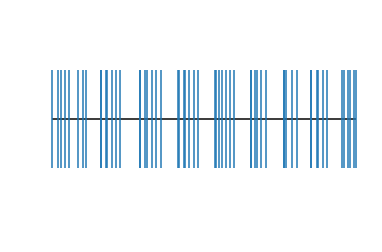

In [33]:
plt.figure()
plt.hlines(1,1,endTime-startTime)
plt.eventplot(sceneShift,orientation='horizontal')
plt.axis('off')
plt.show()

In [46]:
def show_image(filename, frame_number):
    plt.rc('figure', figsize=(10, 5))
    plt.rcParams.update({'font.size': 8})
    frame = camhd.get_frame(filename, frame_number, 'rgb24')
    fig, ax = plt.subplots()
    im1 = ax.imshow(frame)
    plt.yticks(np.arange(0,1081,270))
    plt.xticks(np.arange(0,1921,480))
    plt.title(movLink)

In [47]:
from ipywidgets import interact
from ipywidgets import IntSlider
#file_slider = IntSlider(min=0, max=len(filenames)-1, step=1, value=0, continuous_update=False)
frame_slider = IntSlider(min=0, max=camhd.get_frame_count(movLink), step=10, value=0, continuous_update=False)

def update_range(*args):
    frame_slider.max = camhd.get_frame_count(movLink)-1
    if frame_slider.value > frame_slider.max:
        frame_slider.value = frame_slider.max

interact(show_image, filename=movLink,frame_number=frame_slider);

interactive(children=(Text(value='https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/201…

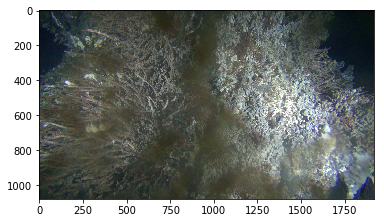

In [36]:
frame = camhd.get_frame(movLink, 2640, 'rgb24')
fig, ax = plt.subplots()
im1 = ax.imshow(frame)